In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


# Customer Churn Prediction
<a href="https://imgbb.com/"><img src="https://i.ibb.co/YtnbTpw/Customer-Churn.png" alt="Customer-Churn" border="0"></a>
* This dataset contains the customer information like customer ID, credit score and various features from the U.S.Bank and going to predict Whether customer will be loyal or leave the bank

## Steps to Follow in this Machine Learning Training
* First will go through the dataset to understand what are the necessary features in the credit card Dataset information
* And then will do some **Exploratory Data Analysis** to understand the dataset and **Visualize** the data
* **Data Cleaning and LabelEncoding** to transform the Data into useable format to use with machine learning algorithms.
* After that, Using the classifiers **Logistic Regression** and **Random Forest** to classify transactions as fraudulent or legitimate.
 
 <br> <font color='Blue'> Content: 
    * [Loading Train Data and Test Data](#1)
    * [Data Visualization](#2)
    * [Data Cleansing and Prepping](#3)
    * [Label Encoding](#4)
    * [Logistic Regression & Ensemble Method Classifier to Train the Model](#5)

<a id="1"></a> <br>
## Loading Train Data and Test Data

In [2]:
train_data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
train_data.shape

(10000, 14)

In [4]:
train_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
train_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
train_data.describe(include = 'object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
train_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
train_data.dropna(ignore_index=True,inplace=True)

In [10]:
# Drop the unwanted columns
data = train_data.drop(columns=['RowNumber','CustomerId','Surname'])

In [11]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
data.info()
#Few columns are category type --> Exited, Geography, Gender, HasCrCard, IsActiveMember

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<a id="2"></a> <br>
## Data Visualization

In [13]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Text(0, 0.5, 'Count')

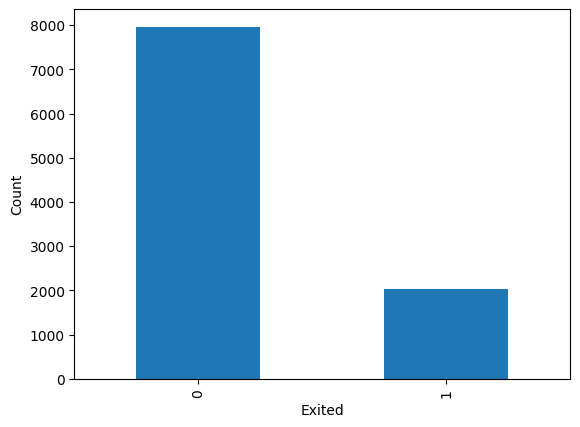

In [14]:
# First the Check whether the dataset is balanced or not
ax = data['Exited'].value_counts().to_frame().plot(kind='bar',legend=False)
ax.set_xlabel('Exited')
ax.set_ylabel('Count')

In [15]:
# Find any Pattern or Trend Followed which leads to the customer churn or not in the dataset
import seaborn as sns
c = data['Geography'].value_counts().to_frame()
c.reset_index()

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


In [16]:
c = data.groupby(['Exited'])['Geography'].value_counts().to_frame().reset_index()
c

,Exited,Geography,count
0,0,France,4204
1,0,Spain,2064
2,0,Germany,1695
3,1,Germany,814
4,1,France,810
5,1,Spain,413


<Axes: xlabel='Geography', ylabel='count'>

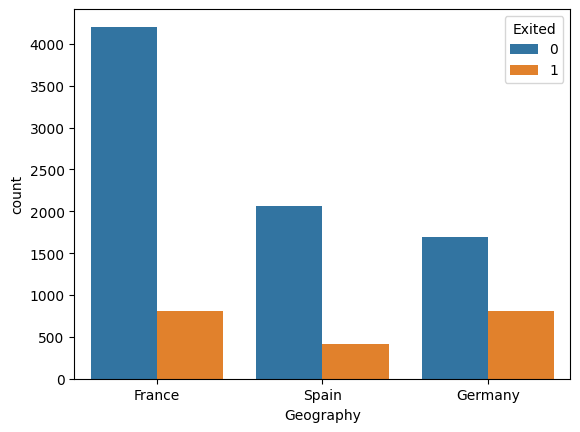

In [17]:
import seaborn as sns 
sns.countplot(x='Geography',data=data,hue='Exited')

### Inference about below barplot 
#### Looks like no trend patterns follows in the Exited of customers along the Geography
#### and If you note that Data Distribution is not normally balanced in the France 

<Axes: xlabel='Geography', ylabel='count'>

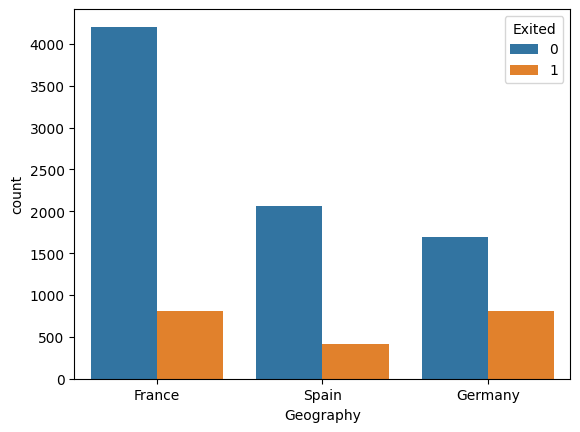

In [18]:
sns.barplot(x='Geography',y='count',data=c,hue='Exited')

<Axes: xlabel='Gender', ylabel='count'>

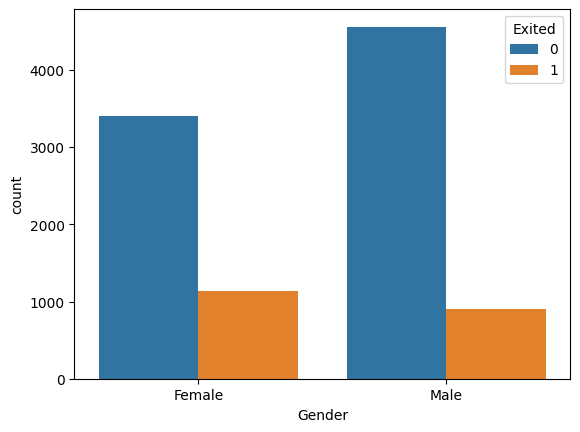

In [19]:
sns.countplot(x='Gender',data=data,hue='Exited')

<Axes: xlabel='NumOfProducts', ylabel='count'>

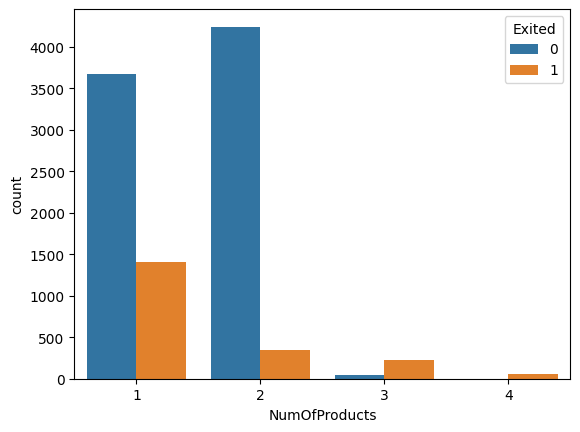

In [20]:
sns.countplot(x='NumOfProducts',data=data,hue='Exited')

<Axes: xlabel='HasCrCard', ylabel='count'>

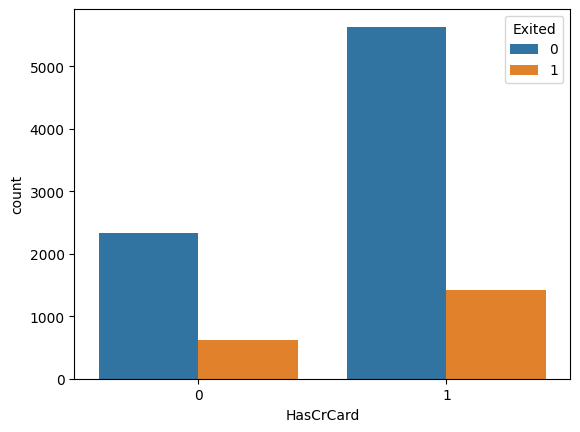

In [21]:
sns.countplot(x='HasCrCard',data=data,hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

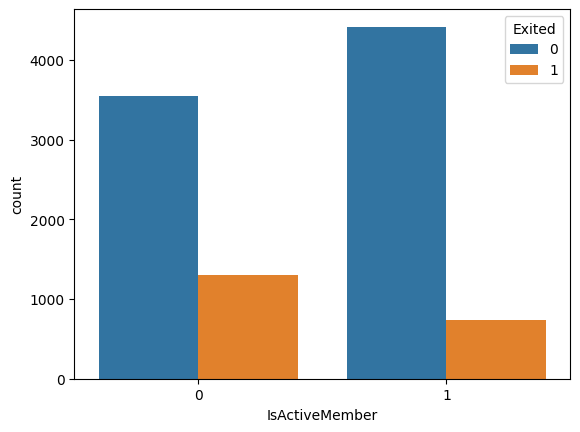

In [22]:
sns.countplot(x='IsActiveMember',data=data,hue='Exited')

In [23]:
data['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

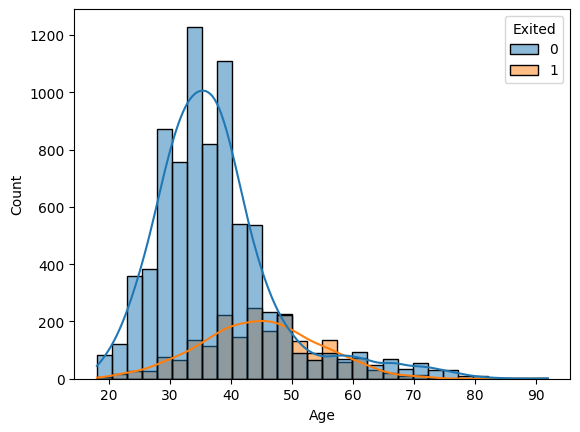

In [24]:
sns.histplot(x=data['Age'], bins=30,data=data, kde=True,hue='Exited')

<Axes: xlabel='Balance', ylabel='Count'>

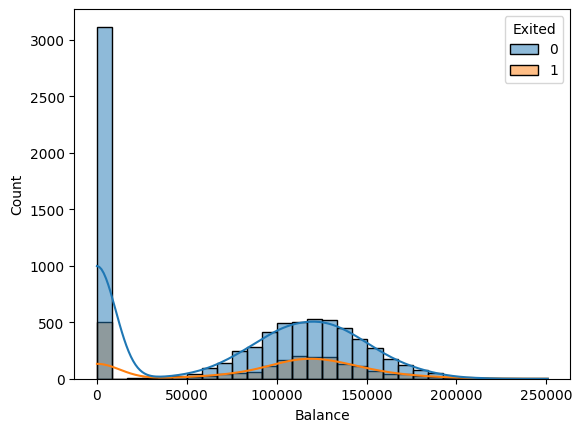

In [25]:
sns.histplot(x=data['Balance'], bins=30,data=data, kde=True,hue='Exited')

In [26]:
data['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

<Axes: xlabel='Tenure', ylabel='count'>

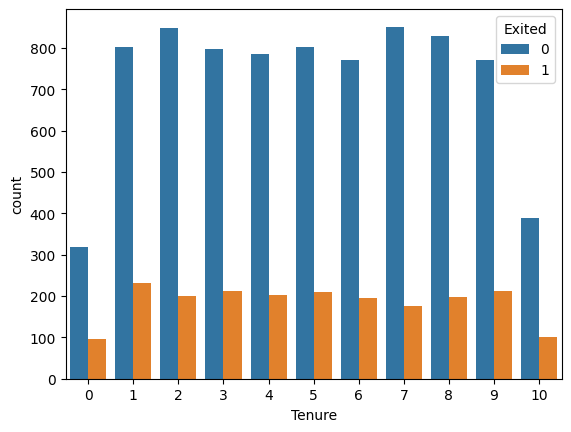

In [27]:
sns.countplot(x='Tenure',data=data,hue='Exited')

### Inference on the Above Visualization
## No trends or patterns followed in the Customer Churn


<a id="3"></a> <br>
## Data Cleansing and Prepping

In [28]:
# Check the Datatypes of columns
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [29]:
data['HasCrCard'] = data['HasCrCard'].astype('object')

In [30]:
data['IsActiveMember'] = data['IsActiveMember'].astype('object')
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited               int64
dtype: object

In [31]:
data['Exited'] = data['Exited'].astype('object')
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

In [32]:
# Data Preprocessing 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = sc.fit_transform(data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,France,Male,0.007457,5,-1.225848,2,1,0,-0.066419,0
9996,-1.391939,France,Male,-0.373958,10,-0.306379,1,1,1,0.027988,0
9997,0.604988,France,Female,-0.278604,7,-1.225848,1,0,1,-1.008643,1
9998,1.256835,Germany,Male,0.293517,3,-0.022608,2,1,0,-0.125231,1



<a id="4"></a> <br>
## Label Encoding

In [33]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,False,False,False
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,False,True,False
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,False,False,False
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,False,False,False
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,5,-1.225848,2,1,0,-0.066419,0,False,False,True
9996,-1.391939,-0.373958,10,-0.306379,1,1,1,0.027988,0,False,False,True
9997,0.604988,-0.278604,7,-1.225848,1,0,1,-1.008643,1,False,False,False
9998,1.256835,0.293517,3,-0.022608,2,1,0,-0.125231,1,True,False,True


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Geography_Germany'] = le.fit_transform(data['Geography_Germany'])
data['Geography_Spain']  = le.fit_transform(data['Geography_Spain'])
data['Gender_Male'] = le.fit_transform(data['Gender_Male']) 
data
                                             

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,5,-1.225848,2,1,0,-0.066419,0,0,0,1
9996,-1.391939,-0.373958,10,-0.306379,1,1,1,0.027988,0,0,0,1
9997,0.604988,-0.278604,7,-1.225848,1,0,1,-1.008643,1,0,0,0
9998,1.256835,0.293517,3,-0.022608,2,1,0,-0.125231,1,1,0,1


In [35]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


<a id="5"></a> <br>
## Logistic Regression & Ensemble Method Classifier to Train the Model

In [36]:
data['HasCrCard'] = data['HasCrCard'].astype('int')
data['IsActiveMember'] = data['IsActiveMember'].astype('int')
data['Exited'] = data['Exited'].astype('int')

In [37]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Exited'])
y= data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [39]:
Lr = LogisticRegression(random_state=42)
Lr.fit(X_train,y_train)
y_pred_train = Lr.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
y_pred_test = Lr.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train,y_pred_train)
acc_train

0.811

In [42]:
acc_test = accuracy_score(y_test,y_pred_test)
acc_test

0.8115

In [43]:
clf1 = RandomForestClassifier(random_state=42)
clf1.fit(X_train,y_train)
y_pred_train1 = clf1.predict(X_train)
y_pred_train1

array([0, 0, 1, ..., 1, 1, 0])

In [44]:
y_pred_test1 = clf1.predict(X_test)
y_pred_test1

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
acc_train1 = accuracy_score(y_train,y_pred_train1)
acc_train1

1.0

In [46]:
acc_test1 = accuracy_score(y_test,y_pred_test1)
acc_test1

0.867